In [63]:
# HTTP.response.body 해석?
# (bytes)로 주고 받고 해석함 -> content-type(MIME) ____/____; 이런식으로 content-type을 전달함
# 대표적으로 text/html을 봄 그래서 bytes->decode->str로 봄
# 또 다르게는 application/json bytes -> decode -> str -> json.loads -> python obj(dict)로 봄
# str이므로 문자열 계산 가능 (Regular Expression)

# HTTP.request.header -> User-agent() 확인하고 바꿀 수 있음

# Regular Expression이 조금 불편했음 따라서, HTML을 (구조화 되어 있는) parsing 할 수 있는 HTMLparser를 사용
# 사용하면 DOM이 나옴 (Tree 구조)
# Tree 구조로 관계 탐색 가능
# 이때, bs4 사용
# element.tag => find, find_all (자식, 자손, 밑에 방향으로 찾음)
# find_parent, find_parents (부모, 조상 찾는 것, 위 방향으로 찾음)
# find_prev_sibling(s), find_next_sibling(s) (나와 부모를 공유하는 형제 노드 찾는 것)

In [64]:
# 5행 4열짜리 table
from requests import get
url = 'https://pythonscraping.com/pages/page3.html'
resp = get(url)

In [65]:
resp.status_code, resp.reason

(200, 'OK')

In [66]:
resp.request.headers, resp.headers
# 여기서 content-type 꼭 확인

({'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive'},
 {'Server': 'nginx', 'Date': 'Thu, 14 Mar 2024 00:51:09 GMT', 'Content-Type': 'text/html', 'Last-Modified': 'Sat, 09 Jun 2018 19:15:59 GMT', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'ETag': 'W/"5b1c276f-965"', 'X-Powered-By': 'PleskLin', 'Content-Encoding': 'br'})

In [67]:
resp.headers['content-type']

'text/html'

In [68]:
import re

re.search(r'text', resp.headers['content-type'])
# match 되면 text 타입인것이다

<re.Match object; span=(0, 4), match='text'>

In [69]:
resp.text

'<html>\n<head>\n<style>\nimg{\n\twidth:75px;\n}\ntable{\n\twidth:50%;\n}\ntd{\n\tmargin:10px;\n\tpadding:10px;\n}\n.wrapper{\n\twidth:800px;\n}\n.excitingNote{\n\tfont-style:italic;\n\tfont-weight:bold;\n}\n</style>\n</head>\n<body>\n<div id="wrapper">\n<img src="../img/gifts/logo.jpg" style="float:left;">\n<h1>Totally Normal Gifts</h1>\n<div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is\nhand-curated by well-paid, free-range Tibetan monks.<p>\nWe haven\'t figured out how to make online shopping carts yet, but you can send us a check to:<br>\n123 Main St.<br>\nAbuja, Nigeria\n</br>We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</div>\n<table id="giftList">\n<tr><th>\nItem Title\n</th><th>\nDescription\n</th><th>\nCost\n</th><th>\nImage\n</th></tr>\n\n<tr id="gift1" class="gift"><td>\nVegetable Basket\n</td><td>\nThis vegetable basket is the perfec

In [70]:
from bs4 import BeautifulSoup

dom = BeautifulSoup(resp.text, 'html.parser')
[tag.name for tag in dom.body.div.find_all(recursive=False)]    # 자식만 보여줌

['img', 'h1', 'div', 'table', 'div']

In [71]:
# DOM # document
# head - body # 구성됨
#        div
#       img, h1, div, table, div 

In [72]:
dom = BeautifulSoup(resp.text, 'lxml')
[tag.name for tag in dom.body.div.find_all(recursive=False)]
# lxml까지는 html.parser와 같다

['img', 'h1', 'div', 'table', 'div']

In [73]:
dom = BeautifulSoup(resp.text, 'html5lib')
[tag.name for tag in dom.body.div.find_all(recursive=False)]
# 갑자기 p가 튀어나옴

['img', 'h1', 'div', 'table', 'p', 'div']

In [74]:
# DOM # document
# head - body # 구성됨
#        div
#       img, h1, div, table, div (html, lxml)
#       img, h1, div, table, p, div (html5lib)

In [75]:
dom.body.a  # 없어도 에러가 나오지 ㅏ않는다
dom.body.a.div.attrs  # static한 방법이라 non-type이 오면 에러가 발생함

AttributeError: 'NoneType' object has no attribute 'div'

In [76]:
# 0.5를 포인트로
node = dom.find(string=re.compile(r'\$0\.50')).find_parent()

In [77]:
node.find_next_sibling().find('img') is not None
node.find_next_sibling().find('img').attrs['src']

'../img/gifts/img4.jpg'

In [78]:
# 이미지 가지고 오고 싶으면
from requests.compat import urljoin

url = urljoin(resp.request.url, node.find_next_sibling().find('img').attrs['src'])

In [79]:
resp = get(url) # img url 가져오기
resp.status_code, resp.reason

(200, 'OK')

In [80]:
resp.request.headers, resp.headers

({'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive'},
 {'Server': 'nginx', 'Date': 'Thu, 14 Mar 2024 00:51:25 GMT', 'Content-Type': 'image/jpeg', 'Content-Length': '85007', 'Last-Modified': 'Mon, 04 Aug 2014 00:49:04 GMT', 'Connection': 'keep-alive', 'ETag': '"53ded880-14c0f"', 'X-Powered-By': 'PleskLin', 'Accept-Ranges': 'bytes'})

In [81]:
resp.headers['content-type']

'image/jpeg'

In [82]:
resp.content

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xfe\x00<CREATOR: gd-jpeg v1.0 (using IJG JPEG v62), quality = 100\n\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xdb\x00C\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xc0\x00\x11\x08\x00\xe1\x01,\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!

In [263]:
fname = re.search(r'.+/(.+\.jpg)$', 'https://pythonscraping.com/img/gifts/img4.jpg').group(1)
fname
# ###여기서부터 다시

'img4.jpg'

In [264]:
fp = open(fname, 'bw')  # bw = binary write
fp.write(resp.content)
fp.close()
# fname = img4.jpg 가 나와야함

In [265]:
!dir

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: 9E59-9DF1

 c:\Users\SAMSUNG\Desktop\SW_Korea\Korea-SW-Academy\8th day ���͸�

2024-03-14  ���� 11:23    <DIR>          .
2024-03-14  ���� 08:59    <DIR>          ..
2024-03-14  ���� 09:39           313,108 data_collect_3.ipynb
2024-03-14  ���� 11:23           282,666 img4.jpg
               2�� ����             595,774 ����Ʈ
               2�� ���͸�  825,783,693,312 ����Ʈ ����


In [ ]:
dom = BeautifulSoup(resp.text, 'html.parser')

In [ ]:
node.find_parents(limit=2)[-1].find_next_sibling()

In [ ]:
dom.find(attrs={'id':'footer'})

In [ ]:
# 여기까지 footer 가져오는 것

In [ ]:
dom.div.find_all(recursive=False)[-1] is dom.find(attrs={'id':'footer'})
# ###여기까지 다시

AttributeError: 'NoneType' object has no attribute 'find_all'

In [93]:
node.find_parents(limit=2)[-1].find_all(recursive=False)[0]
node.find_parents(limit=2)[-1].find().find_all(recursive=False)[1].get_text()

'\nDescription\n'

In [94]:
# 그 위의 두번쨰 값 구해보기

IndexError: list index out of range

In [96]:
# table에 있는 이미지 전부를 찾는법
dom.table.find_all('img')

[<img src="../img/gifts/img1.jpg"/>,
 <img src="../img/gifts/img2.jpg"/>,
 <img src="../img/gifts/img3.jpg"/>,
 <img src="../img/gifts/img4.jpg"/>,
 <img src="../img/gifts/img6.jpg"/>]

In [97]:
dom.table.find_all(attrs={'src':re.compile(r'jpg$')})

[<img src="../img/gifts/img1.jpg"/>,
 <img src="../img/gifts/img2.jpg"/>,
 <img src="../img/gifts/img3.jpg"/>,
 <img src="../img/gifts/img4.jpg"/>,
 <img src="../img/gifts/img6.jpg"/>]

In [100]:
# lxml이라서 그런거 같음

for tag in dom.table.find_all(recursive=False)[1:]:
    print(tag.find_all(recursive=False)[-1])

In [103]:
for tag in node.find_parent().find_previous_siblings():
    print(tag.find_all()[-1])

<img src="../img/gifts/img3.jpg"/>
<img src="../img/gifts/img2.jpg"/>
<img src="../img/gifts/img1.jpg"/>
<th>
Image
</th>


In [105]:
for tag in node.find_parent().find_next_siblings():
    print(tag.find_all()[-1])

<img src="../img/gifts/img6.jpg"/>


In [ ]:
# css selector
# 태그이름 {스타일}
#         ________ 관심 x
# id는 #으로 시작
# class는 .으로 시작
# 속성 [속성=값]
# 여러개 넣을때는 태그이름, .클래스 로 계속 붙일 수 있음
# 가상선택자: first-child   # 첫번째 자식 등등
# 
dom.select('table img')
dom.select('table img[src$="jgp"]') # re 사용 가능
dom.select('table > tf:first-child ~ tr > *:nth-child(4) >:first-child')
# nth-child() - 모든 것 / 2nth-child() - 2배수만 뽑는 것
# 즉, n에 대한 조건 가능
# table의 tf 첫번째 자식
dom.select('td:has("img") > *') # first child와 같은 의미이다
# 자식으로 이미지를 담고 있는 부모를 찾음
dom.select('tr > td:nth-of-type(4)')    # td가 나옴 그 같은 td들 중에 4번째 열
dom.select('tr > td:nth-of-type(4) > img')    # 그 중에서 img를 가져옴

In [186]:
url = 'https://www.google.com/search?q=수지'
resp = get(url, headers={'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'})
resp.reason

'OK'

In [187]:
dom = BeautifulSoup(resp.content, 'html.parser')

[<a data-ved="2ahUKEwiRlcSazvKEAxWJoK8BHYZPBvsQFnoECBoQAQ" href="https://namu.wiki/w/%EC%88%98%EC%A7%80(1994)" jsname="UWckNb" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;opi=89978449&amp;url=https://namu.wiki/w/%25EC%2588%2598%25EC%25A7%2580(1994)&amp;ved=2ahUKEwiRlcSazvKEAxWJoK8BHYZPBvsQFnoECBoQAQ"><br/><h3 class="LC20lb MBeuO DKV0Md">수지(1994)</h3><div class="notranslate HGLrXd NJjxre iUh30 ojE3Fb"><div class="q0vns"><span class="H9lube"><div aria-hidden="true" class="eqA2re NjwKYd Vwoesf"></div></span><div class="GTRloc"><span class="VuuXrf">나무위키</span><div class="byrV5b"><cite class="qLRx3b tjvcx GvPZzd cHaqb" role="text">https://namu.wiki<span class="ylgVCe ob9lvb" role="text"> › 수지(1994)</span></cite></div></div></div></div><span jsaction="rcuQ6b:npT2md" jscontroller="IX53Tb" style="display:none"></span></a>,
 <a data-ved="2ahUKEwiRlcSazvKEAxWJoK8BHYZPBvsQFnoECBkQAQ" href="https://ko.wikipedia.org/wiki/%EC%88%98%EC%A7%80_(1994%EB%85%84)" jsname="UWckNb" ping="/url?sa=t&amp;sourc
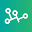
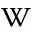
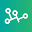
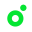
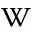
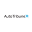

In [188]:
dom.select('a:has(> h3)')  # h3를 자손으로 가지고있는 자손 태그 찾기

In [189]:
for tag in dom.select('a:has(> h3)'):   # a의 자손 중에 h3를 자손으로 가지고있는 애들을 찾는 것
    print(tag.attrs['href'] if tag.has_attr('href') else None)
    print(tag.select_one('h3').get_text())

https://namu.wiki/w/%EC%88%98%EC%A7%80(1994)
수지(1994)
https://ko.wikipedia.org/wiki/%EC%88%98%EC%A7%80_(1994%EB%85%84)
수지 (1994년) - 위키백과, 우리 모두의 백과사전
https://namu.wiki/w/%EC%88%98%EC%A7%80
수지
https://m2.melon.com/artist/song.htm?artistId=514741
수지 (Suzy)- 아티스트채널 - 멜론
https://ko.wikipedia.org/wiki/%EC%88%98%EC%A7%80
수지 - 위키백과, 우리 모두의 백과사전
https://www.sujigu.go.kr/
수지구청
https://www.autotribune.co.kr/news/articleView.html?idxno=12365
"제가 죽어야겠네요"... 가수 수지, 연예인 동료들에 눈물 ...
https://www.youtube.com/watch?v=i7M_gs16UuY
(ENG) 가요숲텐 끝판왕 '수지'의 등장   'Suzy visits gayosoop10'
/search?q=%EC%88%98%EC%A7%80&sca_esv=6470011d51d3dd33&ei=ElTyZZHEBYnBvr0Php-Z2A8&start=10&sa=N
결과 더보기
None
다시 시도


In [193]:
dom.select('a:has(.LC20lb)')

8

In [194]:
for tag in dom.select('a:has(.LC20lb)'):
    print(tag.attrs['href'] if tag.has_attr('href') else None)
    print(tag.select_one('h3').get_text())

https://namu.wiki/w/%EC%88%98%EC%A7%80(1994)
수지(1994)
https://ko.wikipedia.org/wiki/%EC%88%98%EC%A7%80_(1994%EB%85%84)
수지 (1994년) - 위키백과, 우리 모두의 백과사전
https://namu.wiki/w/%EC%88%98%EC%A7%80
수지
https://m2.melon.com/artist/song.htm?artistId=514741
수지 (Suzy)- 아티스트채널 - 멜론
https://ko.wikipedia.org/wiki/%EC%88%98%EC%A7%80
수지 - 위키백과, 우리 모두의 백과사전
https://www.sujigu.go.kr/
수지구청
https://www.autotribune.co.kr/news/articleView.html?idxno=12365
"제가 죽어야겠네요"... 가수 수지, 연예인 동료들에 눈물 ...
https://www.youtube.com/watch?v=i7M_gs16UuY
(ENG) 가요숲텐 끝판왕 '수지'의 등장   'Suzy visits gayosoop10'


In [195]:
for tag in dom.find_all(attrs={'class':re.compile(r'^LC20lb')}):
    print(tag.find_parent().attrs['href'])
    print(tag.get_text())

https://namu.wiki/w/%EC%88%98%EC%A7%80(1994)
수지(1994)
https://ko.wikipedia.org/wiki/%EC%88%98%EC%A7%80_(1994%EB%85%84)
수지 (1994년) - 위키백과, 우리 모두의 백과사전
https://namu.wiki/w/%EC%88%98%EC%A7%80
수지
https://m2.melon.com/artist/song.htm?artistId=514741
수지 (Suzy)- 아티스트채널 - 멜론
https://ko.wikipedia.org/wiki/%EC%88%98%EC%A7%80
수지 - 위키백과, 우리 모두의 백과사전
https://www.sujigu.go.kr/
수지구청
https://www.autotribune.co.kr/news/articleView.html?idxno=12365
"제가 죽어야겠네요"... 가수 수지, 연예인 동료들에 눈물 ...
https://www.youtube.com/watch?v=i7M_gs16UuY
(ENG) 가요숲텐 끝판왕 '수지'의 등장   'Suzy visits gayosoop10'


In [201]:
dom.select('div > div > span > a > h3')
# div 밑에 div 밑에 span 밑에 a 밑에 h3
# 구조에 정확히 일치하는 애들을 찾을때

[<h3 class="LC20lb MBeuO DKV0Md">수지(1994)</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">수지 (1994년) - 위키백과, 우리 모두의 백과사전</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">수지</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">수지 (Suzy)- 아티스트채널 - 멜론</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">수지 - 위키백과, 우리 모두의 백과사전</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">수지구청</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">"제가 죽어야겠네요"... 가수 수지, 연예인 동료들에 눈물 ...</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">(ENG) 가요숲텐 끝판왕 '수지'의 등장   'Suzy visits gayosoop10'</h3>]

In [211]:
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=수지'
resp = get(url)
resp.reason

'OK'

In [212]:
dom = BeautifulSoup(resp.content, 'html.parser')

In [215]:
resp.text

'<!doctype html> <html lang="ko"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta property="og:title" content="수지 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'수지\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'수지\'의 네이버 통합검색 결과입니다."> <title>수지 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_240307.css"> <link rel="stylesheet" type="text/css" href="h

In [221]:
len(dom.select('a.title_link'))
len(dom.select('a:has(.title_link)'))

0

In [222]:
dom.select('.news_link, .link_tit, .title_link')

[<a class="link_tit" href="http://www.msoopent.com/page/page.html?acode=S61703024&amp;mcd=02" onclick='goOtherCR(this,"a=sit_4po*e.link&amp;r=0&amp;i=a00000fa_d8cbfb05f921e5b25456a1c9%5Ex&amp;u="+urlencode(this.href))' target="_blank">SUZY - 매니지먼트숲</a>,
 <a class="link_tit" href="https://www.instagram.com/SKUUKZKY/" onclick='goOtherCR(this,"a=sit_4po*e.link&amp;r=1&amp;i=a00000fa_2a86afd0afc78f493be2c510%5Ei&amp;u="+urlencode(this.href))' target="_blank">숮이 💄💅👡👠🎀👙🌂👗🌂🎀💋💌(@skuukzky) • Instagram 사진 및 동영상</a>,
 <a class="link_tit" href="https://namu.wiki/w/%EC%88%98%EC%A7%80(1994)" onclick='goOtherCR(this,"a=web_gen*w.link&amp;r=0&amp;i=a00000fa_472a6c3889f04fba67298ab2%5Ec&amp;u="+urlencode(this.href))' target="_blank"><mark>수지</mark>(1994) - 나무위키</a>,
 <a class="link_tit" href="https://ko.wikipedia.org/wiki/%EC%88%98%EC%A7%80_(1994%EB%85%84)" onclick='goOtherCR(this,"a=web_gen*w.link&amp;r=2&amp;i=a00000fa_a6c21901214915b70cd30822%5Ec&amp;u="+urlencode(this.href))' target="_blank"><mark>

In [228]:
url = 'https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&q=수지'
ua = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'
resp = get(url, headers={'user-agent': ua})
print(resp.reason)
dom = BeautifulSoup(resp.content, 'html.parser')

OK


In [230]:
resp.text

'<!doctype html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="ko">\n<head profile="http://a9.com/-/spec/opensearch/1.1/">\n<meta http-equiv="content-Type" content="text/html;charset=utf-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta name="autocomplete" content="off" />\n<meta name="referrer" content="always">\n<meta name="format-detection" content="telephone=no" />\n<meta property="og:title" content="수지 &ndash; Daum 검색" />\n<meta property="og:url" content="https://search.daum.net/search?w=tot&amp;q=%EC%88%98%EC%A7%80" />\n<meta property="og:description" content="Daum 검색에서 수지에 대한 최신정보를 찾아보세요." />\n<meta property="og:image" content="https://search1.daumcdn.net/search/statics/common/img/og_search.png" />\n<meta property="og:site_name" content="다음검색" />\n<title>수지 &ndash; Daum 검색</title>\n<link rel="search" type="application/opensearchdescription+xml" href="//search.daum.net/OpenSearch.xml" title="Daum">\n<link rel="stylesheet" type="text/css" href=\'//search1.d

In [233]:
len(dom.select('a.link_major'))
# a:has(.link_major) => a의 자손중에 link_major를 class로 가지는 애를 찾는 것

10

In [243]:
dom.select('c-title')

[<c-title data-clamp="1" data-extra-log='{"person":{"property":"profile"}}' data-href="?w=profile2&amp;DA=PRF&amp;coll=person-main&amp;q=%EC%88%98%EC%A7%80&amp;spId=541664&amp;spcs=30" data-log="dc=PRF&amp;d=541664&amp;p=2&amp;r=1&amp;rc=1&amp;pg=1&amp;at=link" slot="title">수지</c-title>,
 <c-title data-extra-log='{"person":{"property":"profile"}}' data-href="https://tv.kakao.com/v/rvl3pihhrdjmcrca3iud08yok" data-log="dc=PRF&amp;d=541664&amp;p=151&amp;r=1&amp;rc=1&amp;pg=1&amp;at=link" slot="title">국제 경쟁 부문 - 여자 연기자상 〈안나〉 수지, 〈애프터글로우〉 니나 엘렌 외데고르 | KBS 230921 방송 </c-title>,
 <c-title data-extra-log='{"person":{"property":"profile"}}' data-href="https://tv.kakao.com/v/rv6isqh386pwqyjdvy7wnfwt9" data-log="dc=PRF&amp;d=541664&amp;p=151&amp;r=2&amp;rc=1&amp;pg=1&amp;at=link" slot="title">드라마 여우주연 상 - 안나 수지 | KBS 230719 방송 </c-title>,
 <c-title data-extra-log='{"person":{"property":"profile"}}' data-href="https://tv.kakao.com/v/rvamyf980yxlfi02yakbe8c9g" data-log="dc=PRF&amp;d=541664&amp;p=15

In [244]:
# 지금까지 확인 안한 것들
# 1. robots.txt 확인
# 2. 400번대, 500번대 분기

In [252]:
from requests.compat import urlparse

def canFetch(url, path):
    resp = get(urljoin(url, '/robots.txt')) # 특정 사이트 robot.txt 접근
    if resp.status_code != 200: # 200 OK만 나오면 괜찮
        return True
    
    disallowList = [link for link in re.findall(r'disallow\s*:\s*(.+)', resp.text, re.IGNORECASE)]
    # 대문자 소문자 무시하고, resp.text 중에서 disallow 뒤에 있는 애들을 link라는 for문으로 list 작성
    
    if urlparse(path).path in disallowList:
        return False
    # 만약 path가 disallowList(즉, 가면 안되는 곳)에 있으면 False 반환

    return True # 나머지는 True 반환

canFetch('https://www.google.com', '/search?q=수지')

False

In [251]:
urlparse('/search/about?')

ParseResult(scheme='', netloc='', path='/search/about', params='', query='', fragment='')

In [267]:
from requests import request
from requests.exceptions import HTTPError
from time import sleep

def download(url, params={}, data={}, headers={}, method = 'GET', retries=3):
    if not canFetch(url, url):  # robots.txt 검사
        print('수집하면 안됨')  # False일때

    resp = request(method, url, params=params, data=data, headers=headers)
    # parameter로 받은 친구들을 request 옵션으로 넣어서 request 객체 생성
    try:
        resp.raise_for_status() # 에러 확인 용도, HTTPError 뜨면 except로 동작
    except HTTPError as e:
        if 499 < resp.status_code and retries > 0:  # 500번 에러 그리고 retry가 0이 아직 아닐때
            print('재시도 중')                       # 계속 돌아야 하기 때문임
            sleep(5)                                # traffic 너무 먹으면 안되므로
            return download(url, params, data, headers, method, retries-1)  # retry 한번 했으니 하나 빼고
        else:
            print(e.response.status_code)
            print(e.request.headers)
            print(e.response.headers)
            # 에러들 보여주기
            return None
    
    return resp
    # 마지막으로 request 객체 반환
download('https://httpbin.org/status/500')

재시도 중
재시도 중
재시도 중
500
{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive'}
{'Date': 'Thu, 14 Mar 2024 02:28:59 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '0', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}


In [268]:
download('https://www.google.com/search?q=수지')

수집하면 안됨


<Response [200]>

In [269]:
# Crawler : link를 따라다니는 애
# link를 찾아야 함 => link 종류 알아야함
#   a[href], form[action], iframe[src], img[src], video/audio[src], css/js[src]
# 따라다니게끔 만들어야 함 => 전략 필요
#   www => 범위 제한 불가능 (Search space 알 수 없음) => 전략 두가지 존재 Tree 탐색 기법 사용 (DFS, BFS)
#  1-1 1. DFS: 깊이 우선 탐색 (Stack) - 어떤 사이트의 끝을 보고 싶을 때 (대신 링크가 계속해서 뻗어 나가면 언제 돌아올지 모름)
#      2. BFS: 위에서 부터 쭉 훑는 것 (Queue) - 관련도가 높은 애들이 나올 것임 (대신 메모리를 좀 많이 사용함)
#      3, Focused 형태로 만들어줌
#      얘네를 list로 구현할 것
#   2-2 1. javascript:, #, ., .., / => urljoin이 대체자로 해결해줌 거를것은 거르고
#   3-1 1. 검사 list => database 형태로 변경할 것 (ORM)

# 새롭게 찾은 link 검사 (absolute path로 정규화) => 규칙 만들어야함
# 새롭게 찾은 link 방문한적이 있는지 검사해야함 => 관리가 필요함

In [ ]:
URLs = ['http://inisw.kr']
Visited = []

while URLs:
    url = URLs.pop(0)   # 0: FIFO; Queue / -1: FILO; Stack ==> url = URLs.pop(-1)

    Visited.append(url)

    resp = download(url)
    
    if resp is None:
        continue

    if re.search(r'text\/html', resp.headers['content-type']):
        dom = BeautifulSoup(resp.text, 'html.parser')

        for link in dom.select('a[href], iframe[src], img[src], audio[src], frame[src], video[src], style[src], link[src]'):
            newURL = link.attrs['href'] if link.has_attr('href') else link.attrs['src']

            if not re.match(r'#|javascript|mailto', newURL):
                noremlizedURL = urljoin(url, newURL)
                if noremlizedURL not in Visited and noremlizedURL not in URLs:
                    URLs.append(noremlizedURL)

    print(len(URLs), len(Visited))
    # 같은 페이지들이 들어감
    # visited만 검사하기 때문임
    # 따라서 URLs도 검사해야함
    # if noremlizedURL not in Visited and noremlizedURL not in URLs:
    # 바로 이 코드

In [277]:
class A:
    pass

type(A)

type

# BeautifulSoup Selector

여담: html5lib은 Python 2 버전이다
각각 lxml, html.parser, html5lib의 장단점을 적어놓겠다

1. html.parser
    * 장점: 적절한 속도, 관대함, 각종 기능 완비
    * 단점: Python 2.7.3 or 3.2.2 이전 버전 관대 x
2. lxml
    * 장점: 아주 빠름, 관대함
    * 단점: 외부 C 라이브러리 의존
3. html5lib
    * 장점: 아주 관대, 웹 브라우저의 방식으로 페이지 해석, 유효한 HTML5 생성
    * 단점: 아주 느림, 외부 Python 라이브러리 의존, 파이썬2 전용

#### Selector using CSS

```
dom.select('nav > div:first-child')
# nav의 div 중 첫번째만 반환 X

dom.select('nav > ul:first-child')  # 이건 ul의 첫번째 child가 절대 아님 / 그냥 자기 자식의 첫번째 return임

dom.select('nav > ul:nth-child(2)')
# nth-child(#) 이때 #에는 숫자가 들어가야함

dom.select('nav > ul ~ div')
# 같은 라인 선상에서 ul까지 제외하고 div를 만나면 다 저장

dom.select('header ~ div')
# 이 코드의 결과를 보면 이해가 될 것임
# 두개 비교하면 편함

dom.select('nav > ul:nth-of-type(1)')
# 얘가 진짜 ul만 찾는 것

dom.select('ul:has(.nav-item)')
# ul 태그중 자손이 nav-item을 갖고 있으면 찾아냄

# No prac, only in class
dom.select('a:has(> h3)')  # h3를 자손으로 가지고있는 자손 태그 찾기

dom.select('div > div > span > a > h3')
# div 밑에 div 밑에 span 밑에 a 밑에 h3
# 구조에 정확히 일치하는 애들을 찾을때
```

위의 코드 결과값은 prac.ipnyb를 확인해보면 편하다

### Explain codes

##### 1

```
for tag in dom.select('a:has(> h3)'):   # a의 자손 중에 h3를 자손으로 가지고있는 애들을 찾는 것 ... 1
    print(tag.attrs['href'] if tag.has_attr('href') else None)  # ... 2
    print(tag.select_one('h3').get_text())  # ... 3
>>>
https://namu.wiki/w/%EC%88%98%EC%A7%80(1994)    # 2 output
수지(1994)  # 3 output
https://ko.wikipedia.org/wiki/%EC%88%98%EC%A7%80_(1994%EB%85%84)    # 2 output
수지 (1994년) - 위키백과, 우리 모두의 백과사전  # 3 output
https://namu.wiki/w/%EC%88%98%EC%A7%80  # 2 output
수지    # 3 output
https://m2.melon.com/artist/song.htm?artistId=514741    # 2 output
수지 (Suzy)- 아티스트채널 - 멜론    # 3 output
https://ko.wikipedia.org/wiki/%EC%88%98%EC%A7%80    # 2 output
수지 - 위키백과, 우리 모두의 백과사전   # 3 output
https://www.sujigu.go.kr/   # 2 output
수지구청    # 3 output
https://www.autotribune.co.kr/news/articleView.html?idxno=12365 # 2 output
"제가 죽어야겠네요"... 가수 수지, 연예인 동료들에 눈물 ...  # 3 output
https://www.youtube.com/watch?v=i7M_gs16UuY # 2 output
(ENG) 가요숲텐 끝판왕 '수지'의 등장   'Suzy visits gayosoop10'  # 3 output
/search?q=%EC%88%98%EC%A7%80&sca_esv=6470011d51d3dd33&ei=ElTyZZHEBYnBvr0Php-Z2A8&start=10&sa=N  # 2 output
결과 더보기 # 3 output
None    # 2 output
다시 시도   # 3 output
```

하나씩 뜯어보자
1. a의 자손 중, h3를 자손으로 가지고 있는 a들을 찾음 = tag 라고 하자
2. tag 중 href 값을 가져올건데 없으면 None
3. tag의 h3를 선택해서 text만 가지고 올 것이다

##### 2

```
for tag in dom.select('a:has(.LC20lb)'):    # a 자손 중 클래스 LC201b를 가진 애들 ... 1
    print(tag.attrs['href'] if tag.has_attr('href') else None)  # ... 2
    print(tag.select_one('h3').get_text())  # ... 3
>>>
https://namu.wiki/w/%EC%88%98%EC%A7%80(1994)
수지(1994)
https://ko.wikipedia.org/wiki/%EC%88%98%EC%A7%80_(1994%EB%85%84)
수지 (1994년) - 위키백과, 우리 모두의 백과사전
https://namu.wiki/w/%EC%88%98%EC%A7%80
수지
https://m2.melon.com/artist/song.htm?artistId=514741
수지 (Suzy)- 아티스트채널 - 멜론
https://ko.wikipedia.org/wiki/%EC%88%98%EC%A7%80
수지 - 위키백과, 우리 모두의 백과사전
https://www.sujigu.go.kr/
수지구청
https://www.autotribune.co.kr/news/articleView.html?idxno=12365
"제가 죽어야겠네요"... 가수 수지, 연예인 동료들에 눈물 ...
https://www.youtube.com/watch?v=i7M_gs16UuY
(ENG) 가요숲텐 끝판왕 '수지'의 등장   'Suzy visits gayosoop10'
```

굳이 output number를 적진 않겠다

1. a의 자손 중 클래스 LC201b를 가진 a = tag 라고 하자
2. tag 안의 href 값을 가지고 올건데 없으면 None
3. tag가 가직고 있는 h3에서 text만 가지고 올 것임

### Check

이제는 robots.txt, 400, 500번대 에러 분기를 해야했다 

다음 코드는 좀 바꾸도록 하겠다

In [65]:
from requests.compat import urljoin
from requests import HTTPError
from requests import get
import re

def de_fetch(url, path):
    resp = get(urljoin(url, '/robots.txt')) # robot 체크
    if resp.status_code != 200:
        raise HTTPError
    
    resp_iter = re.findall(r'(\w.+?): ([*|/]|.+?)[\n]',resp.text)
    if url in [url[1] for url in list(filter(lambda x: x[0] == "Allow" or x[0] == "allow", resp_iter))]:
        return True
    return False
    

de_fetch('https://www.google.com', '/search?q=수지')

False

In [ ]:
from time import sleep
from requests import request

def download(url, params={}, data={}, headers={}, method='GET', retries=5):
    if not de_fetch(url, re.findall(r'\.\w+(/.+?)$', url)[0]):
        print('Alert!')
    
    resp = request(method, url, params=params, data=data, headers=headers)
    try:
        resp.raise_for_status()
    except HTTPError as e:
        if 499 < resp.status_code and retries > 0:
            print('Retrying')
            sleep(10)
            return download(url, params, data, headers, method, retries-1)
        else:
            raise (e.response.status_code, e.request.headers, e.response.headers)
            return None
    return resp

download('https://httpbin.org/status/500')

### Crawler

link를 따라 다니는 애

얘를 들어, a[href], form[action], iframe[src], img[src], video/audio[src], css/js[src]

**첫째**, 따라다니게끔 만들어야 하는데 전략 필요함

이때 사용되는 기법이 Tree 탐색 기법이다
1. DFS - 깊이 우선 탐색
    * 인접 노드들을 쭉 돌면서 원하는 것을 찾는 기법
    * 즉, 이때는 사이트 내에서 링크를 계속 타면서 끝을 보는 것
2. BFS - 너비 우선 탐색
    * 인접 노드들을 Queue(터널)에 넣는 것
    * 관련도가 높은 애들이 나올 가능성 많음

**둘째**, 쓸데없는 url을 걸러야함

예를 들어 javascript:, #, ., .., / 들로 시작 또는 포함하는 얘들을 걸러야 함

**셋째**, 거른 url들을 검사 해야함

이것은 database 형태로 변경할 것

**마지막**, 방문한적 있는지 체크해야함

관리를 해야한다는 의미이다